# Angular focal sweep

In [1]:
from __future__ import division, print_function
import os
import numpy as np
from scipy.misc import imread
import pyzdde.zdde as py
import pyzdde.arraytrace as at
import matplotlib.pyplot as plt
from IPython.core import display
#local module
import geometric_model_zemax_commons as gm
import iutils.plot.mplutils as mplu

In [2]:
%matplotlib inline

In [3]:
curDir = os.getcwd()
# Location of the Zemax lens files for this notebook
zmxdir = os.path.join(curDir, 'zmxfiles')
ln = pyz.createLink()

## Chief ray at IMG for lens tilts of a paraxial single lens with $m_p=1$ 

In [4]:
lens = "paraxialSingleLens24mmFiniteConj.zmx"
lensPath = os.path.join(zmxdir, lens)
ln.zLoadFile(lensPath)

0

In [5]:
ln.ipzGetLDE()

SURFACE DATA SUMMARY:

Surf     Type         Radius      Thickness                Glass      Diameter          Conic   Comment
 OBJ TILTSURF              -           1000                           535.8984              -
   1 PARAXIAL              -              0                                 10              - Lens 1
 STO STANDARD       Infinity       24.59016                                 10              0 Stop
 IMA STANDARD       Infinity                                          13.17783              0


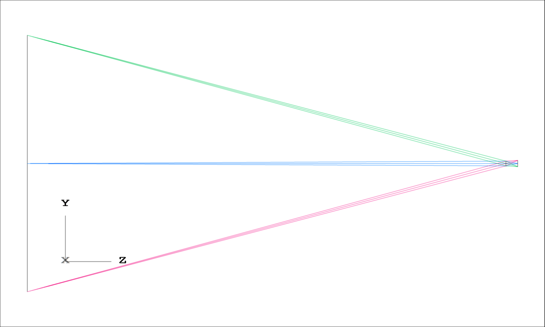

In [6]:
ln.ipzCaptureWindow('L3d')

In [7]:
# First order parameters
ln.ipzGetFirst()

Paraxial magnification : -0.02459016393
Real working F/#       : 2.509334897
Effective focal length : 24.0
Paraxial working F/#   : 2.459016393
Paraxial image height  : 6.588914568


In [8]:
# Pupil information
ln.ipzGetPupil()

Exit pupil position (from IMA)           : -24.59016393
Entrance pupil position (from surface 1) : 1.987846676e-13
Aperture Type                            : Float by stop
Apodization factor                       : 0.0
Apodization type                         : None
Value (stop surface semi-diameter)       : 5.0
Exit pupil diameter                      : 10.0
Entrance pupil diameter                  : 10.0


In [9]:
# A closer look at the lens with cardinals drawn
gm.draw_pupil_cardinal_planes(ln, firstDummySurfOff=40, push=True)

Textual information about the planes:

Exit pupil distance from IMG: -24.59016393
Entrance pupil from Surf 1 @ LDE: 40.0
Focal plane obj F from surf 1 @ LDE:  16.0 
Focal plane img F' from IMA:  -0.590164
Principal plane obj H from surf 1 @ LDE:  40.0 
Principal plane img H' from IMA:  -24.590164
Focal length:  24.0
Principal plane H to ENPP:  0.0
Principal plane H' to EXPP:  -7.00000022391e-08
Principal plane H' to EXPP (abs.) calc. using lens equ.:  0.0
Principal plane H' to rear focal plane:  24.0
Principal plane H to front focal plane:  -24.0

Check "Skip rays to this surface" under "Draw Tab" of the surface property for the dummy and cardinal plane surfaces. See Docstring Notes for details.


In [10]:
# After making the required changes to the surface properties (skip rays)
# in the Zemax main application window, the file with the new surfaces
# to show the position of the pupils and cardinal planes was saved as
# paraxialSingleLens24mmFiniteConj_cardinalsDrawn.zmx
# For drawing the figure, we can use a stored copy in order to avoid
# manually changing surface properties in the LDE again and again
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialSingleLens24mmFiniteConj_cardinalsDrawn.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

In [11]:
#ln.push

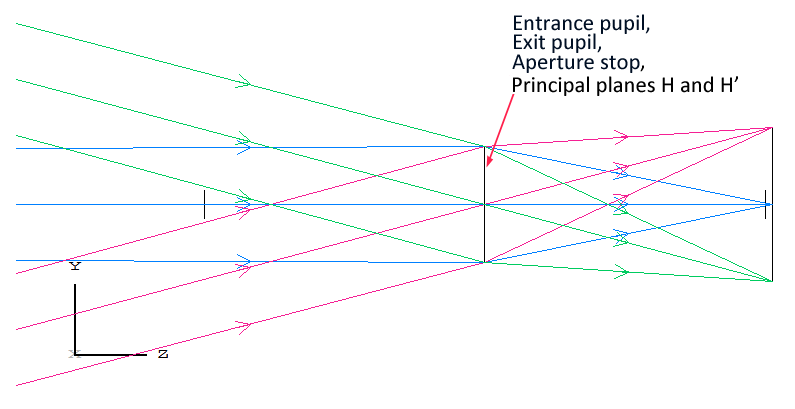

In [33]:
display.Image('images\paraSingle24mmFiniteConj_cardinalsDrawn_lay.png')

In [13]:
# Insert appropriate coordinate breaks to tilt the lens
cb1, cb2 = gm.insert_cbs_to_tilt_lens(ln, lastSurf=15, firstSurf=2, pivot='ENPP', push=True)
cb1, cb2

(3, 18)

Need to do the following:

1. In the main Zemax application, check the "Skip rays to this surface" for the two dummy surfaces just inserted -- one preceding the first CB and second following the second CB -- in the "Draw Tab" under surface properties.

2. Fix the semi-diameters of the ENPP and EXPP surfaces so that they don't change when the lens rotates.

3. Also ensure that the global reference surface is either the image plane or the untilted object plane.

In [14]:
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialSingleLens24mmFiniteConj_cardinalsDrawnWdRotAbtENPP.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

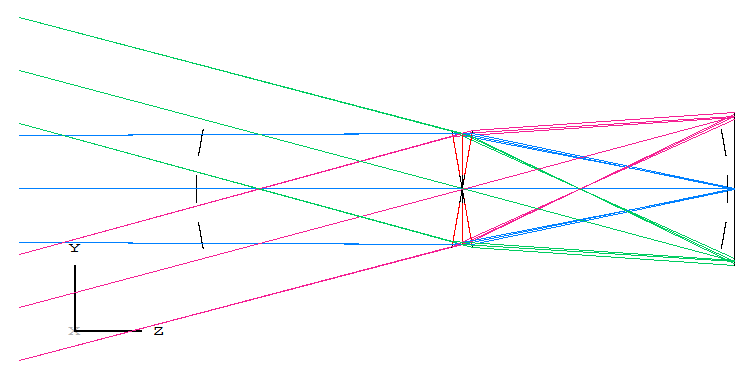

In [37]:
display.Image('images\paraSingle24mmFiniteConj_OverlayThreeLensTilts.png')

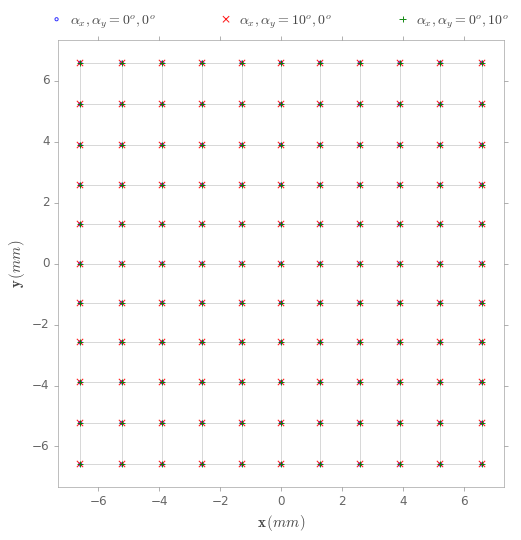

In [16]:
# plot of chief-ray intersects at the image plane
tiltXY = [(0,0), (10, 0), (0, 10)]
gm.plot_chiefray_intersects(ln, cb1, tiltXY)

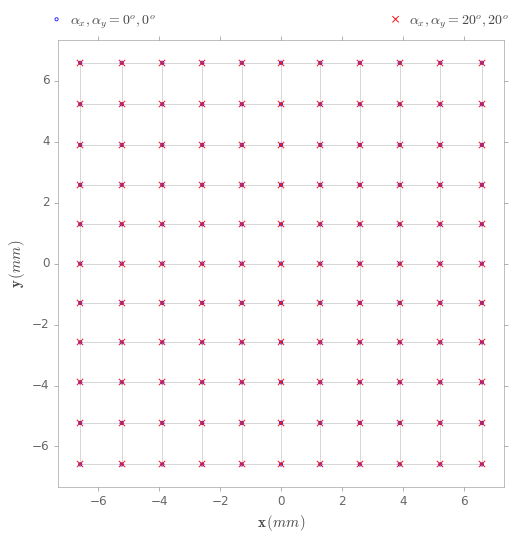

In [17]:
# plot of chief-ray intersects at the image plane for larger tilt angles
tiltXY = [(0,0), (20, 20)]
gm.plot_chiefray_intersects(ln, cb1, tiltXY)

## Chief ray at IMG for lens tilts of a paraxial two lens system with $m_p=1$ 

In [18]:
lens = "paraxialDoubleLens24mmFiniteConj.zmx"
lensPath = os.path.join(zmxdir, lens)
ln.zLoadFile(lensPath)

0

In [19]:
ln.ipzGetLDE()

SURFACE DATA SUMMARY:

Surf     Type         Radius      Thickness                Glass      Diameter          Conic   Comment
 OBJ TILTSURF              -           1000                           544.4728              -
   1 PARAXIAL              -       11.42857                           18.41689              - Lens 1
 STO STANDARD       Infinity       8.571429                           7.142857              0 Stop
   3 PARAXIAL              -       12.58065                           11.54889              - Lens 2
 IMA STANDARD       Infinity                                          13.17273              0


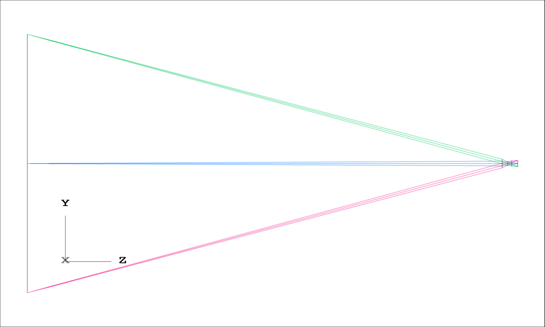

In [20]:
ln.ipzCaptureWindow('L3d')

In [21]:
# First order parameters
ln.ipzGetFirst()

Paraxial magnification : -0.02419354839
Real working F/#       : 2.508402114
Effective focal length : 24.0
Paraxial working F/#   : 2.458064516
Paraxial image height  : 6.58636402


In [22]:
# Pupil information
ln.ipzGetPupil()

Exit pupil position (from IMA)           : -24.58064516
Entrance pupil position (from surface 1) : 16.0
Aperture Type                            : Float by stop
Apodization factor                       : 0.0
Apodization type                         : None
Value (stop surface semi-diameter)       : 3.571428571
Exit pupil diameter                      : 10.0
Entrance pupil diameter                  : 10.0


In [23]:
# A closer look at the lens with cardinals drawn
gm.draw_pupil_cardinal_planes(ln, firstDummySurfOff=40, push=True)

Textual information about the planes:

Exit pupil distance from IMG: -24.58064516
Entrance pupil from Surf 1 @ LDE: 56.0
Focal plane obj F from surf 1 @ LDE:  32.0 
Focal plane img F' from IMA:  -0.580645
Principal plane obj H from surf 1 @ LDE:  56.0 
Principal plane img H' from IMA:  -24.580645
Focal length:  24.0
Principal plane H to ENPP:  0.0
Principal plane H' to EXPP:  1.59999999028e-07
Principal plane H' to EXPP (abs.) calc. using lens equ.:  0.0
Principal plane H' to rear focal plane:  24.0
Principal plane H to front focal plane:  -24.0

Check "Skip rays to this surface" under "Draw Tab" of the surface property for the dummy and cardinal plane surfaces. See Docstring Notes for details.


In [24]:
# After making the required changes to the surface properties (skip rays)
# in the Zemax main application window, the file with the new surfaces
# to show the position of the pupils and cardinal planes was saved as
# paraxialDoubleLens24mmFiniteConj_mp1_cardinalsDrawn.zmx
# For drawing the figure, we can use a stored copy in order to avoid
# manually changing surface properties in the LDE again and again
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialDoubleLens24mmFiniteConj_mp1_cardinalsDrawn.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

In [25]:
#ln.push

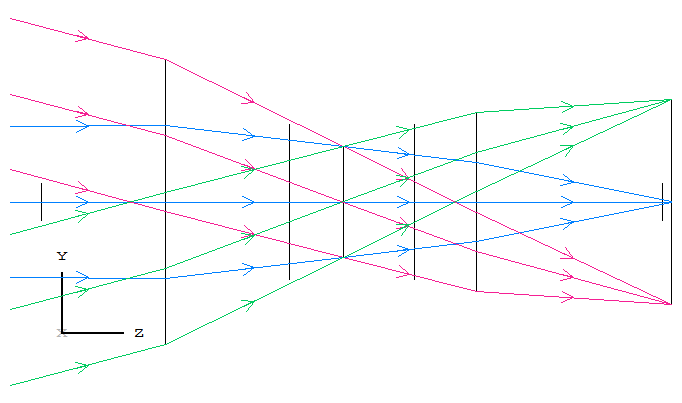

In [35]:
display.Image('images\paraDoubleLens24mmMp1FiniteConj_cardinalsDrawn_lay.png')

In [27]:
# Insert appropriate coordinate breaks to tilt the lens
cb1, cb2 = gm.insert_cbs_to_tilt_lens(ln, lastSurf=16, firstSurf=2, pivot='ENPP', push=True)
cb1, cb2

(3, 19)

As before, we need to do the following:

1. In the main Zemax application, check the "Skip rays to this surface" for the two dummy surfaces just inserted -- one preceding the first CB and second following the second CB -- in the "Draw Tab" under surface properties.

2. Fix the semi-diameters of the ENPP and EXPP surfaces so that they don't change when the lens rotates.

3. Also ensure that the global reference surface is either the image plane or the untilted object plane.

In [28]:
# The above file, after setting the dummy surface to "skip rays", was saved as 
# paraxialDoubleLens24mmFiniteConj_mp1_cardinalsDrawnWdRotAbtENPP.zmx
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialDoubleLens24mmFiniteConj_mp1_cardinalsDrawnWdRotAbtENPP.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

The following line drawing figure shows only the chief rays from the three field points for three tilt positions of the lens about the ENPP (identified by the red lines). The rays are colored by configuration number.

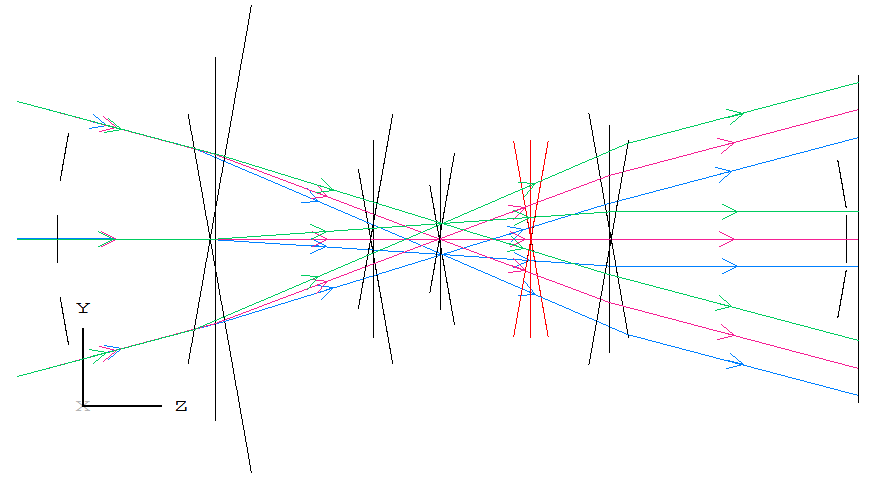

In [36]:
display.Image('images\paraDouble24mmMp1FiniteConj_OverlayThreeLensTilts.png')

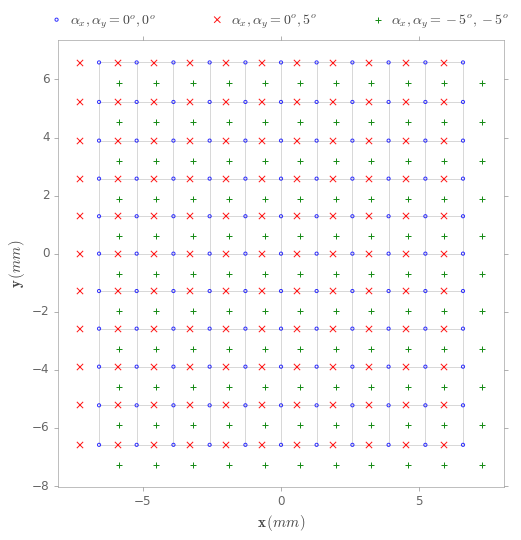

In [30]:
# plot of chief-ray intersects at the image plane
tiltXY = [(0,0), (0, 5), (-5, -5)]
gm.plot_chiefray_intersects(ln, cb1, tiltXY)

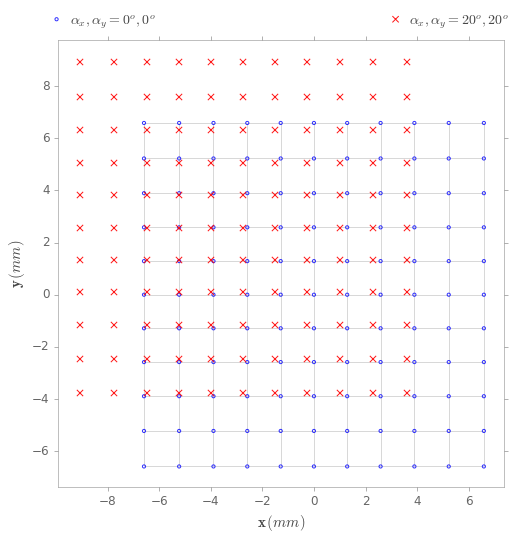

In [31]:
# plot of chief-ray intersects at the image plane for larger tilt angles
tiltXY = [(0,0), (20, 20)]
gm.plot_chiefray_intersects(ln, cb1, tiltXY)

In [ ]:
ln.close()

## Image simulation

### Single paraxial thin lens

In [9]:
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialSingleLens24mmFiniteConj_cardinalsDrawnWdRotAbtENPP.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

In [10]:

def simulate_depth_imaging(ln, objdist, objarr, fldarr, cfgname='spl.cfg', objht=89, pupsam=2, imgsam=2, 
                           psfx=1, psfy=1, pixsize=0.004, xpix=1550, ypix=760, timeout=180):
    """simulate imaging with planes at different depths
    
    ln : object
        pyzdde object
    objdist : list
        list of object distances from the lens vertex (thickness of OBJ surface)
    objarr : list
        list of image files that represents the planar objects at the corresponding
        object distances in `objdist`
    fldarr : list
        list of field numbers 
    cfgname : string
        name of settings file to use 
    
    
    Notes
    -----
    The "reference" parameter in the Image Simulation is set to "vertex".
    
    """
    assert len(objdist) == len(objarr) == len(fldarr), \
    "input arrays must be of equal lengths"
    img = np.zeros((ypix, xpix, 3), dtype='uint8')
    fpath = os.path.split(ln.zGetFile())[0]
    cfg = os.path.join(fpath, cfgname)
    cfg = ln.zSetImageSimulationSettings(settingsFile=cfg, height=objht, pupilSample=pupsam, 
                                         imgSample=imgsam, psfx=psfx, psfy=psfy, 
                                         pixelSize=pixsize, xpix=xpix, ypix=ypix,
                                         reference=1, aberr=2, illum=1)
    for dist, obj, fld in zip(objdist, objarr, fldarr):
        ret = ln.zSetSurfaceData(surfNum=0, code=ln.SDAT_THICK, value=dist)
        assert ret == dist
        ret = ln.zModifyImageSimulationSettings(settingsFile=cfg, image=obj, field=fld)
        imgInfo, imgData = ln.zGetImageSimulation(settingsFile=cfg, timeout=timeout)
        assert imgInfo.xpix == xpix and imgInfo.ypix == ypix
        for i in range(3): 
            img[:, :, i] = img[:, :, i] + np.array(imgData, dtype='uint8')[:, :, i]
        print("Image simulation for obj {} completed.".format(obj))
        
    return img

In [11]:
objdist=[960, 760, 1160]
objarr = ['kingcard.jpg', 'queencard.jpg', 'jackcard.jpg']
fldarr = [1, 4, 5]

img = simulate_depth_imaging(ln, objdist, objarr, fldarr)

Image simulation for obj kingcard.jpg completed.
Image simulation for obj queencard.jpg completed.
Image simulation for obj jackcard.jpg completed.


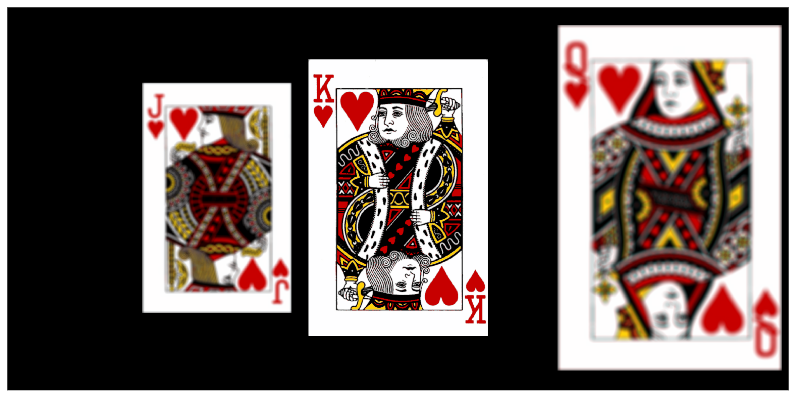

In [12]:
_ = mplu.imshow(img, figsize=(14, 10))

In [13]:
ln.close()